In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


'Great for my office. I use this daily in many ways, to include spelling for me and background music.'

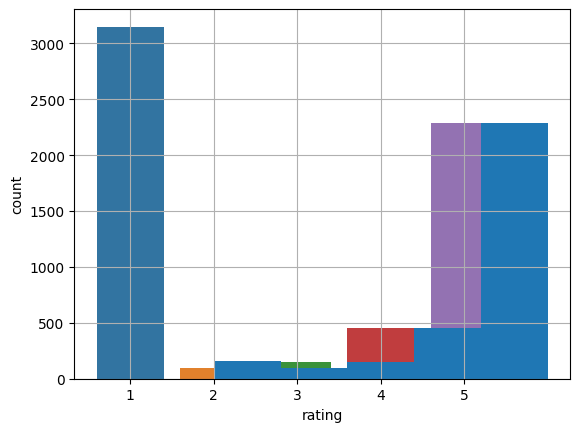

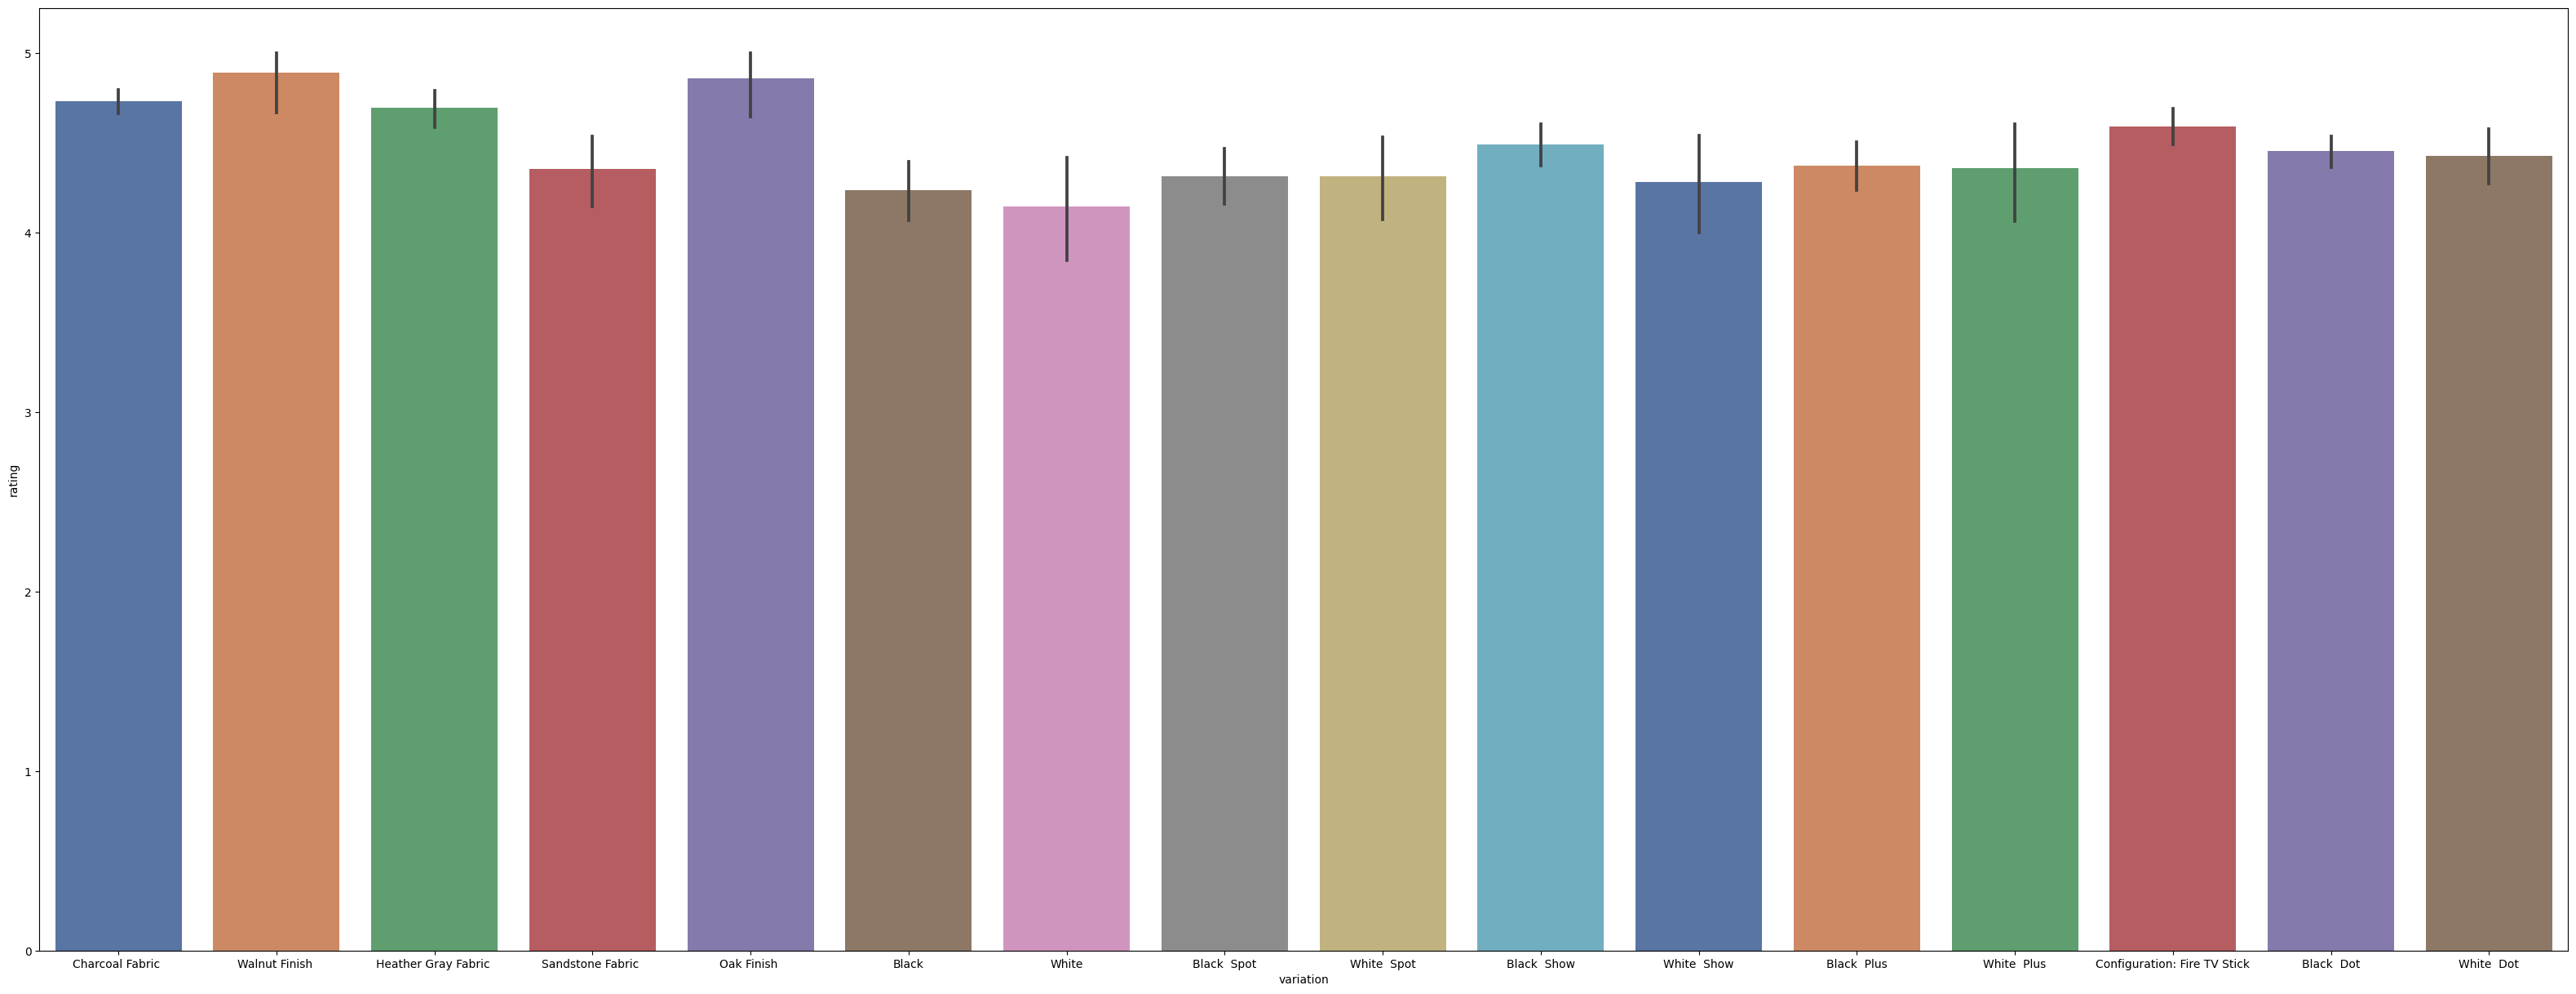

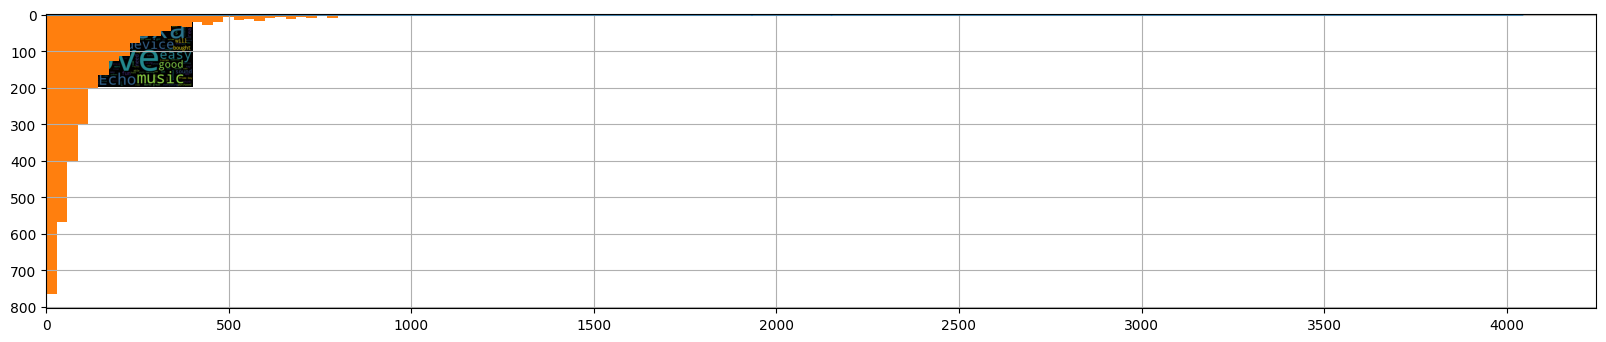

In [2]:
# Load the data
df_alexa = pd.read_csv('amazon_alexa.tsv', sep='\t')

# Display some information about the dataframe
df_alexa.head()
df_alexa.tail()
df_alexa.keys()
df_alexa["verified_reviews"]
df_alexa.info()
df_alexa.describe()

### DATA VISUALIZATION ###
positive = df_alexa[df_alexa['feedback'] == 1]
negative = df_alexa[df_alexa['feedback'] == 0]

# Visualizations
sns.countplot(df_alexa['feedback'], label='Count')
sns.countplot(df_alexa['rating'], label='Count')
sns.countplot(x='rating', data=df_alexa)
df_alexa['rating'].hist(bins=5)
plt.figure(figsize=(40, 15))
sns.barplot(x='variation', y='rating', data=df_alexa, palette='deep')

# Word Cloud
words = df_alexa['verified_reviews'].astype(str).tolist()
words_as_one_string = ' '.join(words)
plt.figure(figsize=(20, 30))
plt.imshow(WordCloud().generate(words_as_one_string))

### DATA CLEANING AND FEATURE ENGINEERING ###

# Before using CountVectorizer, fill NaN values with empty strings
df_alexa['verified_reviews'] = df_alexa['verified_reviews'].fillna('')

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Apply CountVectorizer to the 'verified_reviews' column
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])
alexa_countvectorizer.shape

# Other analysis
word_count_array = alexa_countvectorizer.toarray()
plt.plot(word_count_array[1, :])
df_alexa['verified_reviews'][1]

# Calculate the length of reviews
df_alexa['length'] = df_alexa['verified_reviews'].apply(len)
df_alexa.head()
df_alexa['length'].hist(bins=100)

# Explore reviews with min length
min_char = df_alexa['length'].min()
df_alexa[df_alexa['length'] == min_char]['verified_reviews'].iloc[0]

# Explore reviews with max length
max_char = df_alexa['length'].max()
df_alexa[df_alexa['length'] == max_char]['verified_reviews'].iloc[0]

# Example of exploring reviews with a specific length
df_alexa[df_alexa['length'] == 100]['verified_reviews'].iloc[0]
